In [1]:
import mmf_setup;mmf_setup.nbinit()
%pylab inline --no-import-all
from nbimports import *    

<IPython.core.display.Javascript object>

# Basic Things
* For any given wavefunction, compute it's velocity, current, etc.

Let $\psi(x)=e^{i(kx+\omega t)}$

In [24]:
omega = 4
L = 2*np.pi
N = 16
dx = L/N
x = (np.arange(N) * dx - L / 2)
k = 2*np.pi * np.fft.fftfreq(N, dx)

def phi(x):
    return np.exp(5j*x)

def d(f):
    return np.fft.ifft(1j*k*np.fft.fft(f))

In [25]:
f = phi(x)
df = d(f)

Let
$$
\psi(x)=a(x)+ib(x)\\
\psi^*(x)=a(x)-ib(x)
$$
then
$$
\frac{\partial \psi(x)}{\partial x}=\frac{\partial a(x)}{\partial x} + i\frac{\partial b(x)}{\partial x}\\
\frac{\partial \psi^*(x)}{\partial x}=\frac{\partial a(x)}{\partial x} - i\frac{\partial b(x)}{\partial x}\\
\left[\frac{\partial \psi(x)}{\partial x}\right]^*=\frac{\partial a(x)}{\partial x} - i\frac{\partial b(x)}{\partial x}\\
$$
which means:
$$
\left[\frac{\partial \psi(x)}{\partial x}\right]^*=\frac{\partial \psi^*(x)}{\partial x}
$$

In [26]:
np.allclose(d(f).conj(), d(f.conj()))

True

* ### <font color='Green'> Numerically it does  agree!</font>

## compute currents
* The current is defined:
\begin{align}
j
&=\frac{\hbar}{2mi}\left(\psi^*\frac{\partial \psi}{\partial x} - \psi\frac{\partial \psi^*}{\partial x}\right)\\
&=-0.5i\frac{\hbar}{m}\left(\psi^*\frac{\partial \psi}{\partial x} - \psi\frac{\partial \psi^*}{\partial x}\right)\\
&=\frac{\hbar}{m}\text{Imag}\left(\psi^*\frac{\partial \psi}{\partial x}\right)\\
\end{align}

In [61]:
def j(y):
    return -0.5j * (y.conj() * d(y)-y*d(y).conj())

In [90]:
def j0(y):
    return (y.conj() * d(y)).imag

In [91]:
np.allclose(j(f),j0(f).real)

True

* ### <font color="green">The current formula should be right in BCS code</font>

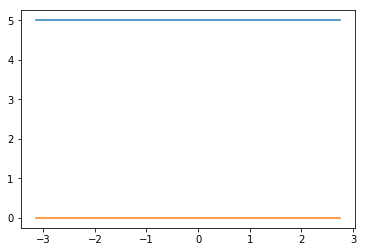

In [7]:
plt.plot(x,j(y).real)
plt.plot(x,j(y).imag)

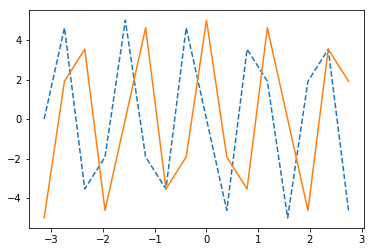

In [81]:
#plt.plot(xs, y.imag)
#plt.plot(xs, y.real)
#plt.plot(xs, y.imag)
plt.plot(x, dy.real,'--')
plt.plot(x, dy.imag,'-')
#plt.plot(xs, dy.imag,'+')


In [82]:
f = np.exp(1j*x**2)
df =  1j*f * 2 * x

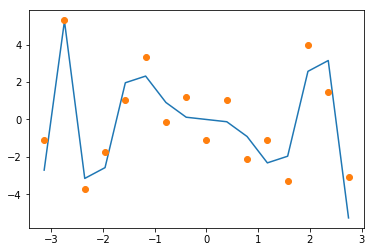

In [83]:
plt.plot(x,df)
plt.plot(x,d(f),'o')

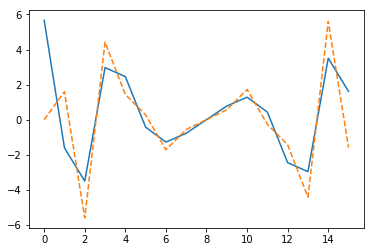

In [12]:
y1 = np.sin(x**2)
plt.plot(2*x*np.cos(x**2))
plt.plot(d(y1),'--')